# Zadanie domowe - EDA Danych dotyczących Irysów

* Twoim zadaniem jest wykonanie analizy danych zawartych w załączonym pliku CSV (`25__iris.csv`).
* Plik znajduje się pod video. Pamiętaj, żeby wrzucić plik do tego samego folderu, w którym znajduje się ten notebook.
* Wykorzystaj nowo nabytą wiedzę z biblioteki `Pandas`
* Jeżeli jest taka konieczność posiłkuj się [code explainerem](https://codeexplainer.imprv.ai/) lub / i [data chatterem](https://datachatter.imprv.ai/) (który również te dane ma dostępne).
* Prześlij na discordzie notebook z rozwiązaniem (`#modul-4-zad1`)
* Pamiętaj:

1. Nie spiesz się
2. Potraktuj zadanie domowe jak prawdziwy projekt
3. Dodawaj opisy, obserwacje, wnioski
4. Dodaj wizualizacje
5. Dodaj konkluzję i wnioski końcowe

Powodzenia!!! I mega zabawy!

## O Danych

Zbiór danych zawiera informacje o trzech gatunkach irysów: Iris setosa, Iris versicolor, i Iris virginica.

Dane obejmują pomiary czterech cech: długość i szerokość działki kielicha oraz długość i szerokość płatka.

Każdy wiersz w zbiorze danych reprezentuje pojedynczy kwiat, a wartości pomiarów są podane w centymetrach.

Zbiór składa się z 150 próbek, po 50 dla każdego gatunku, i jest szeroko stosowany jako podstawowy zbiór danych do
testowania algorytmów klasyfikacji oraz w nauce o danych i uczeniu maszynowym.

Kolumny:
* **długość kielicha (sepal length)** - Długość kielicha w cm
* **szerokość kielicha (sepal width)** - Szerokość kielicha w cm
* **długość płatka (petal length)** - Długość płatka w cm
* **szerokość płatka (petal width)** - Szerokość płatka w cm
* **klasa (class)** - Klasa irysa (setosa, versicolor, virginica)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

In [4]:
df = pd.read_csv('raw_iris.csv', sep=",")
df

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.sample(10)

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
24,4.8,3.4,1.9,0.2,Iris-setosa
68,6.2,2.2,4.5,1.5,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
31,5.4,3.4,1.5,0.4,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
129,7.2,3.0,5.8,1.6,Iris-virginica
65,6.7,3.1,4.4,1.4,Iris-versicolor
28,5.2,3.4,1.4,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
93,5.0,2.3,3.3,1.0,Iris-versicolor


#### Dane wyglądają na kompletne dotyczą kilku rodzajów irysów (wielkości ich płatków oraz kielichów)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### brak brakujących danych

In [7]:
df.nunique()

długość kielicha (sepal length)     35
szerokość kielicha (sepal width)    23
długość płatka (petal length)       43
szerokość płatka (petal width)      22
klasa (class)                        3
dtype: int64

In [8]:
df[df.duplicated()]

,długość kielicha (sepal length),szerokość kielicha (sepal width),długość płatka (petal length),szerokość płatka (petal width),klasa (class)
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


#### W naszych danych istnieją 3 duplikaty
istnieje możliwość że pomiary zostały błędnie wykonane 
lecz ilość tych duplikatów oraz charakterystyka kwiatów 
nie przeszkadza w poprawnym zrozumieniu tych danych 
więc pozostawię te duplikaty do dalszej analizy 
być może niektóre egzemplaże kwiatów miały identyczne wymiary


<Axes: title={'center': 'długość kielicha (sepal length)'}, xlabel='klasa (class)'>

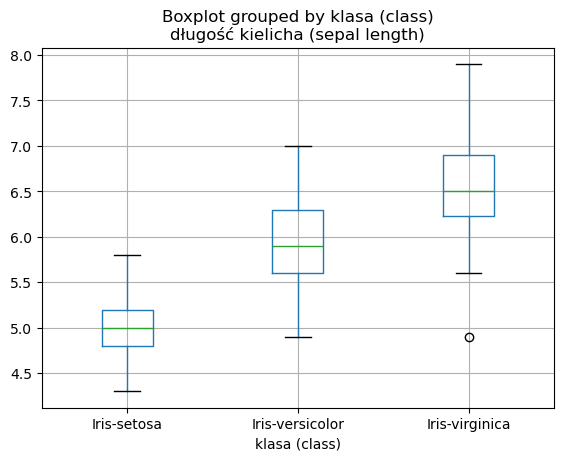

In [9]:
df.boxplot(column='długość kielicha (sepal length)', by= 'klasa (class)')

<Axes: title={'center': 'szerokość kielicha (sepal width)'}, xlabel='klasa (class)'>

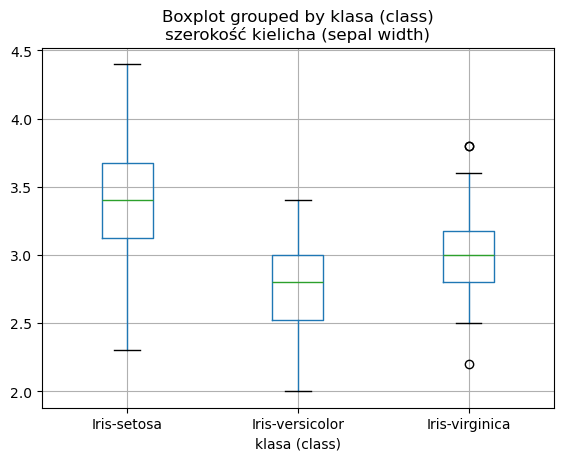

In [10]:
df.boxplot(column='szerokość kielicha (sepal width)', by= 'klasa (class)')

<Axes: title={'center': 'długość płatka (petal length)'}, xlabel='klasa (class)'>

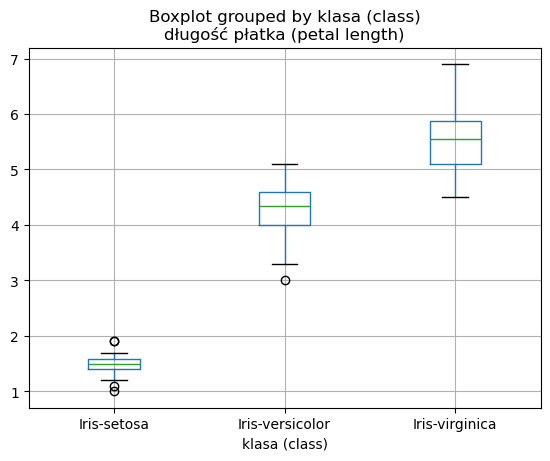

In [11]:
df.boxplot(column='długość płatka (petal length)', by= 'klasa (class)')

<Axes: title={'center': 'szerokość płatka (petal width)'}, xlabel='klasa (class)'>

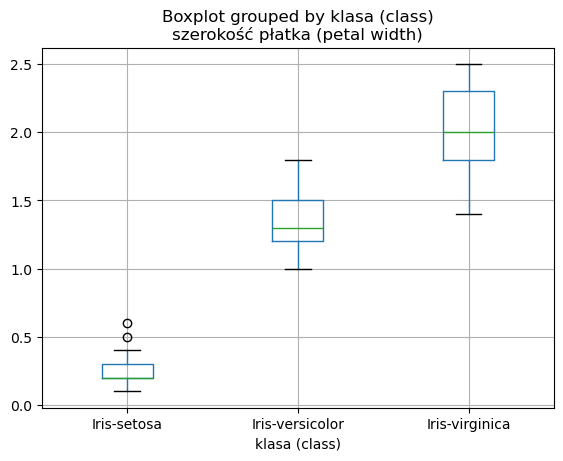

In [12]:
df.boxplot(column='szerokość płatka (petal width)', by= 'klasa (class)')


#### można zauważyć że wartości odstających jest niewiele oraz większość wyników jest skupiona wokół mediany 

C:\Users\Zoltr\AppData\Local\Temp\ipykernel_25284\1729857075.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


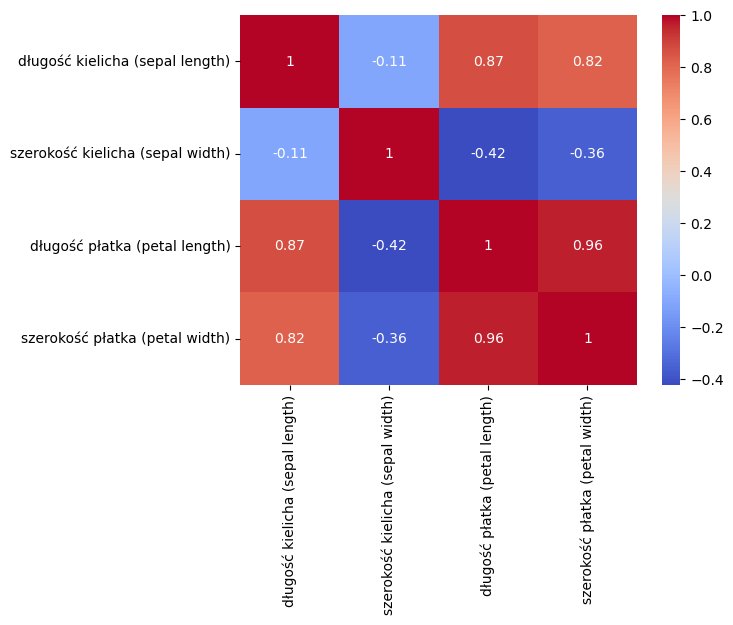

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#### można zauważyć ze mamy tutaj kilka silnych zależności jednak aby lepiej to zaobserwować spójżmy na uproszczoną wizualizację poniżej

#### Każdy z gatunków irysów którym się przygladamy można rozrużnic po wielkości lisci i kielichów 
zauważmy jak zmieniająś się ich długości i szerokosci względem tego do którego gatunku nalerzą


In [14]:
srednie_dane_platek = df.groupby('klasa (class)')[['długość płatka (petal length)', 'szerokość płatka (petal width)']].mean().to_dict(orient='index')

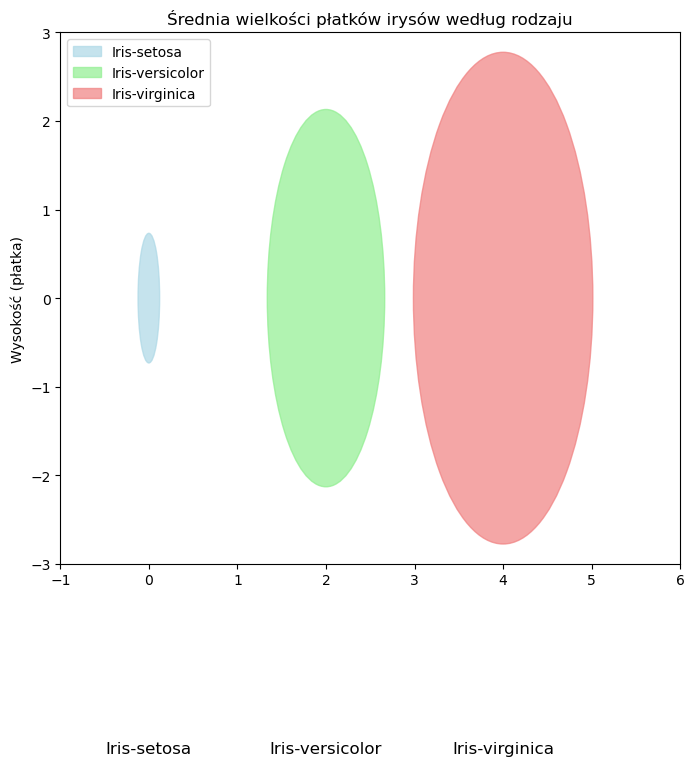

In [15]:
# Kolory dla różnych gatunków
kolory = {
    'Iris-setosa': 'lightblue',
    'Iris-versicolor': 'lightgreen',
    'Iris-virginica': 'lightcoral'
}

fig, ax = plt.subplots(figsize=(8, 8))

# Wstawiamy elipsy dla każdego rodzaju
for i, (klasa, dane) in enumerate(srednie_dane_platek.items()):
    # Przesuwamy elipsy w poziomie, żeby się nie nakładały
    x_shift = i * 2
    elipsa = patches.Ellipse(
        (x_shift, 0),    # (x, y) pozycja środka
        width=dane['szerokość płatka (petal width)'],   
        height=dane['długość płatka (petal length)'],
        color=kolory[klasa],
        alpha=0.7,
        label=klasa
    )
    ax.add_patch(elipsa)
    # Podpisy klas
    ax.text(x_shift, -5, klasa, ha='center', va='top', fontsize=12)

# Ustawienia osi
ax.set_xlim(-1, 6)
ax.set_ylim(-3, 3)
ax.set_aspect('equal')
plt.title('Średnia wielkości płatków irysów według rodzaju')
plt.ylabel('Wysokość (płatka)')
plt.legend()
plt.show()

In [16]:
srednie_dane_kielich = df.groupby('klasa (class)')[['długość kielicha (sepal length)', 'szerokość kielicha (sepal width)']].mean().to_dict(orient='index')

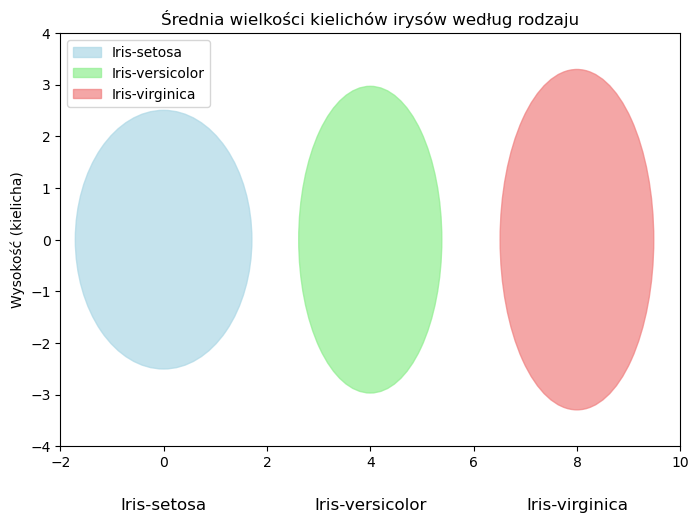

In [17]:
# Kolory dla różnych gatunków
kolory = {
    'Iris-setosa': 'lightblue',
    'Iris-versicolor': 'lightgreen',
    'Iris-virginica': 'lightcoral'
}

fig, ax = plt.subplots(figsize=(8, 8))

# Wstawiamy elipsy dla każdego rodzaju
for i, (klasa, dane) in enumerate(srednie_dane_kielich.items()):
    # Przesuwamy elipsy w poziomie, żeby się nie nakładały
    x_shift = i * 4
    elipsa = patches.Ellipse(
        (x_shift, 0),    # (x, y) pozycja środka
        width=dane['szerokość kielicha (sepal width)'],   
        height=dane['długość kielicha (sepal length)'],
        color=kolory[klasa],
        alpha=0.7,
        label=klasa
    )
    ax.add_patch(elipsa)
    # Podpisy klas
    ax.text(x_shift, -5, klasa, ha='center', va='top', fontsize=12)

# Ustawienia osi
ax.set_xlim(-2, 10)
ax.set_ylim(-4, 4)
ax.set_aspect('equal')
plt.title('Średnia wielkości kielichów irysów według rodzaju')
plt.ylabel('Wysokość (kielicha)')
plt.legend()
plt.show()

#### Jak widać, irysy, którym się przyglądamy, mają podobne rozmiary kielichów i jednocześnie diametralnie różnią się rozmiarem płatków.
1. można zauważyć że im dłuższy płatek tym dłuższy kielich
2. im dłuższy płatek tym jest szerszy.
3. im płatek szerszy tym kielich jest dłuższy   

### Podsumowanie
    1. DataFrame zawiera informacje na temat wielkości płatków i kielichów trzech rodzajów irysów
    2. DataFrame nie zawiera brakujących wartości
    3. Istnieją 3 duplikaty nie mające wpływu na analizę
    4. Większość danych jest skupiona wokół mediany
    5. Dane posiadają nie wiele wartości odstających
    6. Istnieją 3 silne korelacje dodatnie

In [18]:
df.to_excel('new_iris_data.xlsx', index=False)